# Distance-based Models

## Geometry of Vectors

Vectors have two common geometric interpretations: 

1. **Vectors as Points in Feature Space**: In this interpretation, we consider vectors as points in a space with a fixed reference point called the origin.

2. **Vectors as Displacement**: In this interpretation, we consider vectors as displacements between points in space.

### 1. Vectors as Points in Feature Space

Given a vector, the first interpretation that we should give it is as a point in space. 

In two or three dimensions, we can visualize these points by using the components of the vectors to define the location of the points in space compared to a fixed reference called the origin. This can be seen in the figure below. 

<center><img src="https://d2l.ai/_images/grid-points.svg" width="60%" style="filter:invert(1)"/></center>

<!-- <center><img  width="60%" src="https://d2l.ai/_images/grid-points.svg"></center> -->


This geometric point of view allows us to consider the problem on a more abstract level. No longer faced with some insurmountable seeming problem like classifying pictures as either cats or dogs, we can start considering tasks abstractly as collections of points in space and picturing the task as discovering how to separate two distinct clusters of points.

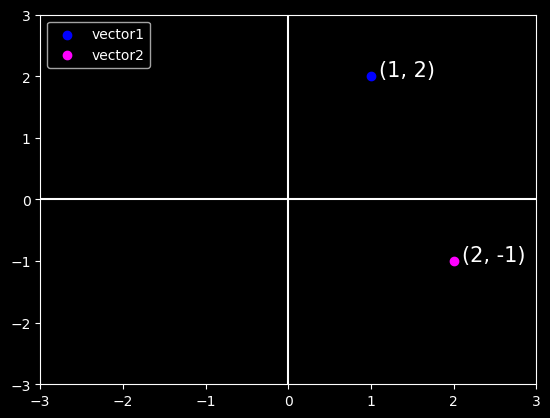

In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt

plt.style.use('dark_background')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

vector1 = [1, 2]
vector2 = [2, -1]

displacement = 0.1

# Plotting vector 1
plt.scatter(x=vector1[0], y=vector1[1], color='blue');
plt.text(x=vector1[0]+displacement, y=vector1[1], \
             s=f"(%s, %s)" % (vector1[0], vector1[1]), size=15);

# Plotting vector 2
plt.scatter(x=vector2[0], y=vector2[1], color='magenta');
plt.text(x=vector2[0]+displacement, y=vector2[1], \
             s=f"(%s, %s)" % (vector2[0], vector2[1]), size=15);

# Plotting the x and y axes
plt.axhline(0, color='white');
plt.axvline(0, color='white');

# Plotting the legend
plt.legend(['vector1', 'vector2'], loc='upper left');

### 2. Vectors as directions in feature space 

In parallel, there is a second point of view that people often take of vectors: as directions in space. Not only can we think of the vector $\textbf{v} = [3, 2]^{T}$ as the location $3$ units to the right and 
$2$ units up from the origin, we can also think of it as the direction itself to take $3$ steps to the right and $2$ steps up. In this way, we consider all the vectors in figure below the same.

<center><img src="https://d2l.ai/_images/par-vec.svg" width="50%" style="filter:invert(1)"/></center>

<!-- ``` {figure} https://d2l.ai/_images/par-vec.svg
---
width: 50%
name: par-vec
---
Any vector can be visualized as an arrow in the plane. In this case, every vector drawn is a representation of the vector $(3, 2)^\top$
``` -->

<!-- <center><img width="50%" src="https://d2l.ai/_images/par-vec.svg"></center> -->

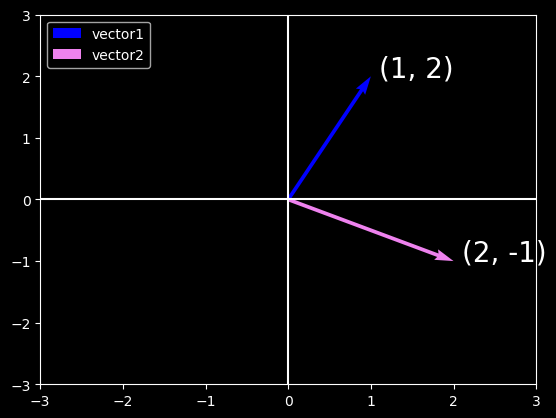

In [ ]:

plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Plotting vector 1
plt.quiver(0, 0, vector1[0], vector1[1], scale=1, scale_units='xy', angles='xy', color='blue')
plt.text(x=vector1[0]+displacement, y=vector1[1], \
             s=f"(%s, %s)" % (vector1[0], vector1[1]), size=20);

# Plotting vector 2
plt.quiver(0, 0, vector2[0], vector2[1], scale=1, scale_units='xy', angles='xy', color='violet')
plt.text(x=vector2[0]+displacement, y=vector2[1], \
             s=f"(%s, %s)" % (vector2[0], vector2[1]), size=20);

plt.legend(['vector1', 'vector2'], loc='upper left');

# Plotting the x and y axes
plt.axhline(0, color='white');
plt.axvline(0, color='white');

One of the benefits of this shift is that we can make visual sense of the act of vector addition. In particular, we follow the directions given by one vector, and then follow the directions given by the other, as seen below: 

<center><img src="https://d2l.ai/_images/vec-add.svg" width="50%" style="filter:invert(1)"/></center>

<!-- ``` {figure} https://d2l.ai/_images/vec-add.svg
---
width: 50%
name: vec-add
---
We can visualize vector addition by first following one vector, and then another.
``` -->

<!-- <center><img width="50%" src="https://d2l.ai/_images/vec-add.svg"></center> -->

Vector subtraction has a similar interpretation. By considering the identity that $\mathbf{u} = \mathbf{v} + (\mathbf{u} - \mathbf{v})$, we see that the vector $\mathbf{u} - \mathbf{v}$ is the direction that takes us from the point $\mathbf{v}$ to the point $\mathbf{u}$. 

In [ ]:
vector1 = pd.Series([1, 2])
vector2 = pd.Series([2, -1])

sum_vector = vector1 + vector2

sum_vector

0    3
1    1
dtype: int64

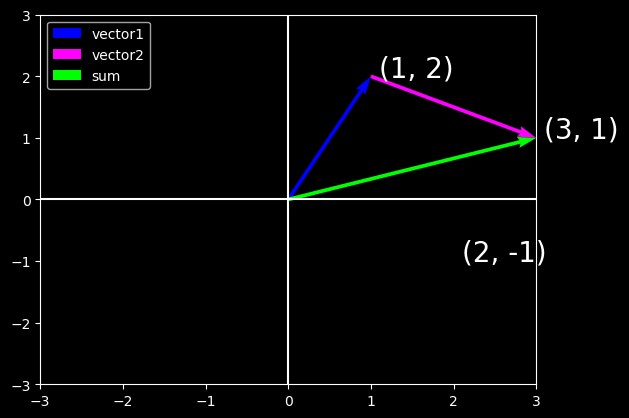

In [ ]:
vector1 = pd.Series([1, 2])
vector2 = pd.Series([2, -1])
sum = vector1 + vector2

plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Plotting vector 1
plt.quiver(0, 0, vector1[0], vector1[1], scale=1, scale_units='xy', angles='xy', color='blue')
plt.text(x=vector1[0]+displacement, y=vector1[1], \
             s=f"(%s, %s)" % (vector1[0], vector1[1]), size=20);

# Plotting vector 2
plt.quiver(vector1[0], vector1[1], vector2[0], vector2[1], scale=1, scale_units='xy', angles='xy', color='magenta')
plt.text(x=vector2[0]+displacement, y=vector2[1], \
             s=f"(%s, %s)" % (vector2[0], vector2[1]), size=20);


plt.quiver(0, 0, sum[0], sum[1], scale=1, scale_units='xy', angles='xy', color='lime')
plt.text(x=sum[0]+displacement, y=sum[1], \
             s=f"(%s, %s)" % (sum[0], sum[1]), size=20);

plt.legend(['vector1', 'vector2', 'sum'], loc='upper left');

# Plotting the x and y axes
plt.axhline(0, color='white');
plt.axvline(0, color='white');


## Norms 

Some of the most useful operators in linear algebra are _norms_. A norm is a function $\| \cdot \|$ that maps a vector to a scalar. 

Informally, the norm of a vector tells us magnitude or length of the vector. 


For instance, the $l_2$ norm measures the euclidean length of a vector. That is, $l_2$ norm measures the euclidean distance of a vector from the origin $(0, 0)$.

<!-- Here, we are employing a notion of _size_ that concerns the magnitude of a vector’s components (not its dimensionality). -->
 
 <!--and satisfies the following three properties:

1. Given any vector $\mathbf{x}$, if we scale (all elements of) the vector by a scalar $\alpha \in \mathbb{R}$, its norm scales accordingly:

$$\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|$$

2. For any vectors $\mathbf{x}$ and $\mathbf{y}$, norms satisfy the triangle inequality:
$$\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|$$

3. The norm of a vector is nonnegative and it only vanishes if the vector is zero:

$$ \|\mathbf{x}\| > 0 \textrm{ for all } \mathbf{x} \neq 0. $$

Many functions are valid norms and different norms encode different notions of size. The Euclidean norm that we all learned in elementary school geometry when calculating the hypotenuse of a right triangle is the square root of the sum of squares of a vector’s elements. Formally, this is called the $l_2$ norm and expressed as
-->
$$ \|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2} $$ 

In [ ]:
x = pd.Series(vector1)
l2_norm = (x**2).sum()**(1/2)
l2_norm

2.23606797749979

The $l_1$ norm is also common and the associated measure is called the Manhattan distance. By definition, the $l_1$ norm sums the absolute values of a vector’s elements:

$$ \|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right| $$

Compared to the $l_2$ norm, it is less sensitive to outliers. To compute the $l_1$ norm, we compose the absolute value with the sum operation.

In [ ]:
l1_norm = x.abs().sum()
l1_norm

6

Both the $l_1$ and $l_2$ norms are special cases of the more general norms:

$$ \|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}. $$

In [ ]:
vec = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9])

p = 3

lp_norm = ((abs(vec))**p).sum()**(1/p)

lp_norm

12.651489979526238

## Dot Product

One of the most fundamental operations in linear algebra (and all of data science and machine learning) is the dot product. 

Given two vectors $\textbf{x}, \textbf{y} \in \mathbb{R}^d$, their _dot product_ $\textbf{x}^{\top} \textbf{y}$ (also known as _inner product_ $\langle \textbf{x}, \textbf{y} \rangle$) is a sum over the products of the elements at the same position: 

$$\textbf{x}^\top \textbf{y} = \sum_{i=1}^{d} x_i y_i$$

In [ ]:
import pandas as pd

x = pd.Series([1, 2, 3])
y = pd.Series([4, 5, 6])

x.dot(y) # 1*4 + 2*5 + 3*6 

32

Equivalently, we can calculate the dot product of two vectors by performing an elementwise multiplication followed by a sum:


In [ ]:
sum(x * y)

32

Dot products are useful in a wide range of contexts. For example, given some set of values, denoted by a vector $ \mathbf{x} \in \mathbb{R}^{n} $ , and a set of weights, denoted by $\mathbf{x} \in \mathbb{R}^{n}$, the weighted sum of the values in $\mathbf{x}$ according to the weights $\mathbf{w}$ could be expressed as the dot product $\mathbf{x}^\top \mathbf{w}$. When the weights are nonnegative and sum to $1$, i.e., $(\sum_{i=1}^n w_i = 1)$, the dot product expresses a _weighted average_. After normalizing two vectors to have unit length, the dot products express the cosine of the angle between them. Later in this section, we will formally introduce this notion of _length_.

## Dot Products and Angles

If we take two column vectors $\mathbf{u}$ and $\mathbf{v}$, we can form their dot product by computing:

$$ \mathbf{u}^\top\mathbf{v} = \sum_i u_i\cdot v_i $$

Because the equation above is symmetric, we will mirror the notation of classical multiplication and write

$$ \mathbf{u}\cdot\mathbf{v} = \mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u}, $$

to highlight the fact that exchanging the order of the vectors will yield the same answer.


The dot product also admits a geometric interpretation: **dot product it is closely related to the angle between two vectors**. 

<center><img src="https://d2l.ai/_images/vec-angle.svg" width="50%" style="filter:invert(1)"/></center>


To start, let’s consider two specific vectors:

$$ \mathbf{v} = (r,0) \; \textrm{and} \; \mathbf{w} = (s\cos(\theta), s \sin(\theta)) $$

The vector $\mathbf{v}$ is length $r$ and runs parallel to the $x$-axis, and the vector $\mathbf{w}$ is of length $s$ and at angle $\theta$ with the $x$-axis. 

If we compute the dot product of these two vectors, we see that

$$ \mathbf{v}\cdot\mathbf{w} = rs\cos(\theta) = \|\mathbf{v}\|\|\mathbf{w}\|\cos(\theta) $$

With some simple algebraic manipulation, we can rearrange terms to obtain <u>the equation for any two vectors $\mathbf{v}$ and $\mathbf{w}$</u>:

$$ \theta = \arccos\left(\frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}\right) $$

We will not use it right now, but it is useful to know that we will refer to vectors for which the angle is $\pi/2$(or equivalently $90^{\circ}$) as being orthogonal. 

By examining the equation above, we see that this happens when $\theta = \pi/2$, which is the same thing as $cos(\theta) = 0$. 

The only way this can happen is if the dot product itself is zero, and two vectors are orthogonal if and only if $\mathbf{v}\cdot\mathbf{w} = 0$. 

This will prove to be a helpful formula when understanding objects geometrically.

It is reasonable to ask: why is computing the angle useful? Consider the problem of classifying text data. We might want the topic or sentiment in the text to not change if we write twice as long of document that says the same thing. 

For some encoding (such as counting the number of occurrences of words in some vocabulary), this corresponds to a doubling of the vector encoding the document, so again we can use the angle.


In [ ]:
v = pd.Series([0, 2])
w = pd.Series([2, 0])

v.dot(w)

0

In [ ]:
from math import acos

def l2_norm(vec):
    return (vec**2).sum()**(1/2)

v = pd.Series([0, 2])
w = pd.Series([2, 0])

v.dot(w) / (l2_norm(v) * l2_norm(w))

0.0

In [ ]:
from math import acos, pi

theta = acos(v.dot(w) / (l2_norm(v) * l2_norm(w)))

theta == pi / 2

True

## Cosine Similarity/Distance

In ML contexts where the angle is employed to measure the closeness of two vectors, practitioners adopt the term cosine similarity to refer to the portion

$$ \cos(\theta) = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}. $$

<u>The cosine takes a maximum value of $1$ when the two vectors point in the same direction, a minimum value of $-1$ when they point in opposite directions, and a value of $0$ when the two vectors are orthogonal. </u>

Note that **cosine similarity** can be converted to **cosine distance** by subtracting it from $1$ and dividing by 2. 

$$ \text{Cosine Distance} = \frac{1 - \text{Cosine Similarity}}{2}$$

where $\text{Cosine Similarity} = \frac{\mathbf{v}\cdot\mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}$

Cosine distance is a very useful alternative to Euclidean distance for data where the absolute magnitude of the features is not particularly meaningful, which is a very common scenario in practice.


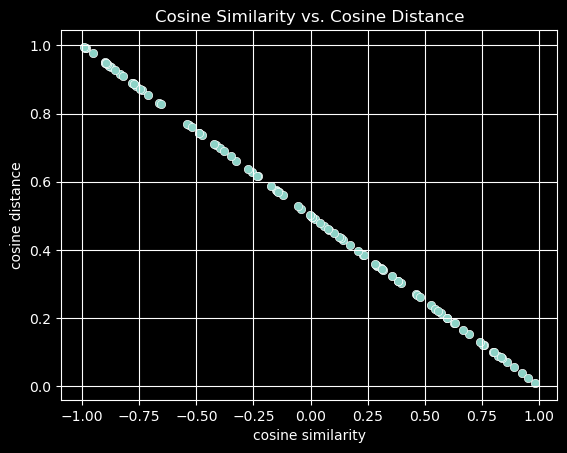

In [ ]:
from random import uniform
import pandas as pd
import seaborn as sns

df = pd.DataFrame()
df['cosine similarity'] = pd.Series([uniform(-1, 1) for i in range(100)])
df['cosine distance']   = (1 - df['cosine similarity'])/2
ax = sns.scatterplot(data=df, x='cosine similarity', y='cosine distance');
ax.set(title='Cosine Similarity vs. Cosine Distance')
plt.grid()


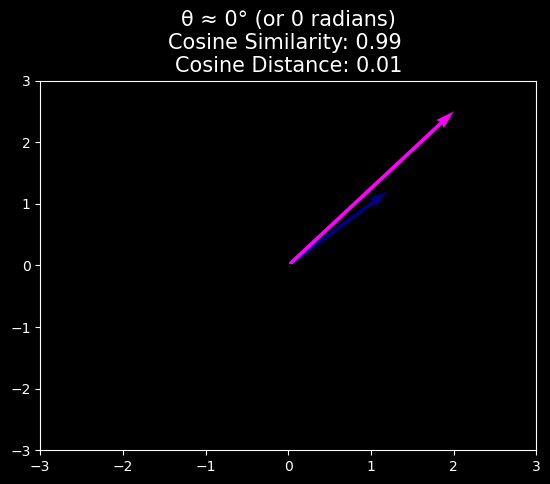

In [ ]:
def l2_norm(vec):
    return (vec**2).sum()**(1/2)

plt.axhline(0, color='black');
plt.axvline(0, color='black');

v = pd.Series([1.2, 1.2])
w = pd.Series([2, 2.5])

plt.quiver(0, 0, v[0], v[1], scale=1, scale_units='xy', angles='xy', color='navy')
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units='xy', angles='xy', color='magenta')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

cosine_similarity = v.dot(w) / (l2_norm(v) * l2_norm(w))
cosine_similarity = round(cosine_similarity, 2)

cosine_distance = (1 - cosine_similarity) / 2
cosine_distance = round(cosine_distance, 2)

plt.title("θ ≈ 0° (or 0 radians)\n"+\
          "Cosine Similarity: %s \nCosine Distance: %s" % \
          (cosine_similarity, cosine_distance), size=15);

In [ ]:
cosine_similarity

0.0

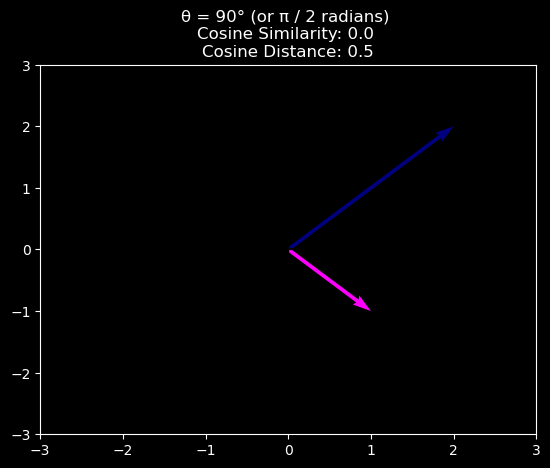

In [ ]:

plt.axhline(0, color='black');
plt.axvline(0, color='black');

v = pd.Series([2, 2])
w = pd.Series([1, -1])

plt.quiver(0, 0, v[0], v[1], scale=1, scale_units='xy', angles='xy', color='navy')
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units='xy', angles='xy', color='magenta')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

cosine_similarity = v.dot(w) / (l2_norm(v) * l2_norm(w))
cosine_similarity = round(cosine_similarity, 2)


cosine_distance = (1 - cosine_similarity) / 2
cosine_distance = round(cosine_distance, 2)

plt.title("θ = 90° (or π / 2 radians) \nCosine Similarity: %s \nCosine Distance: %s" % (cosine_similarity, cosine_distance));

Note that cosine similarity can be negative, which means that the angle is greater than $90^{\circ}$, i.e., the vectors point in opposite directions.

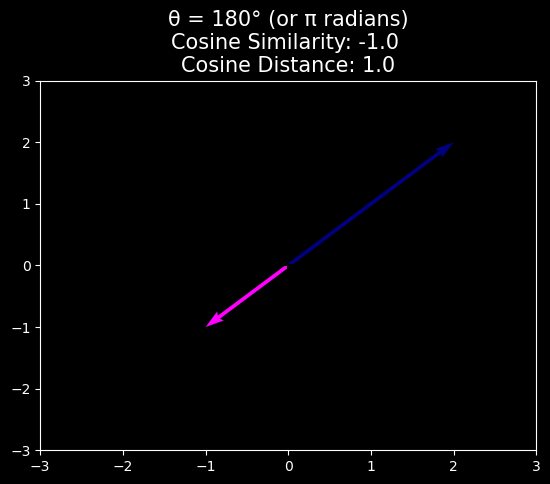

In [ ]:
v = pd.Series([2, 2])
w = pd.Series([-1, -1])

plt.quiver(0, 0, v[0], v[1], scale=1, scale_units='xy', angles='xy', color='navy')
plt.quiver(0, 0, w[0], w[1], scale=1, scale_units='xy', angles='xy', color='magenta')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.axhline(0, color='black');
plt.axvline(0, color='black');

cosine_similarity = v.dot(w) / (l2_norm(v) * l2_norm(w))

cosine_similarity = round(cosine_similarity, 2)

cosine_distance = (1 - cosine_similarity) / 2
cosine_distance = round(cosine_distance, 2)

plt.title("θ = 180° (or π radians)\n"+\
          "Cosine Similarity: %s \nCosine Distance: %s" % \
          (cosine_similarity, cosine_distance), size=15);

<!-- 
## Hyperplanes 

In addition to working with vectors, another key object that you must understand to go far in linear algebra is the hyperplane, a generalization to higher dimensions of a line (two dimensions) or of a plane (three dimensions). In an 
-dimensional vector space, a hyperplane has 
 dimensions and divides the space into two half-spaces.

<center><img style="filter:invert(1)" width="70%" src="https://community.alteryx.com/t5/image/serverpage/image-id/53830i662E91D903B0F64B/image-size/large?v=v2&px=999"></center>
 
Let’s start with an example. Suppose that we have a column vector $\mathbf{w}=[2,1]^\top$. We want to know, “what are the points $\mathbf{v}$ with $\mathbf{w}\cdot\mathbf{v} = 1$?” We can define $\mathbf{v} = [x, y]$

$$ \mathbf{w}\cdot\mathbf{v} = 1$$

$$ [2, 1]^\top \cdot [x, y] = 1$$

$$ 2x + y = 1$$

$$ y = -2x + 1$$

Recall that the equation for a line is $y = mx + b$. Therefore, in the equations above, we have defined a line where the slope ($m$) is $-2$ and the intercept ($b$) is $1$. -->


<!-- <center>
<img src="https://d2l.ai/_images/proj-vec.svg">
</center> -->

<!-- ``` {figure} https://d2l.ai/_images/proj-vec.svg
---
width: 50%
name: proj-vec
---
Recalling trigonometry, we see the formula $\|\mathbf{v}\|\cos(\theta)$ is the length of the projection of the vector $\mathbf{v}$ onto the direction of $\mathbf{w}$
``` -->

<!-- If we consider the geometric meaning of this expression, we see that this is equivalent to saying that the length of the projection of $\mathbf{v}$ onto the direction of 
$\mathbf{w}$ is exactly $1/\|\mathbf{w}\|$, as is shown in the figure above. 

The set of all points where this is true is a line at right angles to the vector $\mathbf{w}$. 

If we wanted, we could find the equation for this line and see that it is $2x + y = 1$ or equivalently $y = 1 - 2x$.

If we now look at what happens when we ask about the set of points with $\mathbf{w}\cdot\mathbf{v} > 1$ or $\mathbf{w}\cdot\mathbf{v} < 1$ we can see that these are cases where the projections are longer or shorter than $1/\|\mathbf{w}\|$, respectively.

Thus, those two inequalities define either side of the line.  -->
<!-- 
In this way, we have found a way to cut our space into two halves, where all the points on one side have dot product below a threshold, and the other side above as we see below:

<center><img src="https://d2l.ai/_images/space-division.svg" width="50%" style="filter:invert(1)"/></center>

The story in higher dimension is much the same. If we now take $\mathbf{w} = [1,2,3]^\top$ and ask about the points in three dimensions with $\mathbf{w}\cdot\mathbf{v} = 1$, we obtain a plane at right angles to the given vector $\mathbf{w}$. The two inequalities again define the two sides of the plane as is shown below: 

<center><img src="https://d2l.ai/_images/space-division-3d.svg" width="50%" style="filter:invert(1)"/></center> -->

## Matrices 

We denote matrices by bold capital letters (e.g., $X$, $Y$, and $Z$), and represent them in code by `pd.DataFrame`. The expression $\mathbf{A} \in \mathbb{R}^{m \times n}$ indicates that a matrix $\textbf{A}$ contains $m \times n$ real-valued scalars, arranged as $m$ rows and $n$ columns. When 
$m = n$, we say that a matrix is _square_. Visually, we can illustrate any matrix as a table. To refer to an individual element, we subscript both the row and column indices, e.g., $a_{ij}$ is the value that belongs to $\mathbf{A}$’s $i^{th}$ row and $j^{th}$ column:

$$ \begin{split}\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.\end{split} $$


In [1]:
import pandas as pd 

df = pd.DataFrame({'a': [1, 20, 3, 40], 'b': [50, 6, 70, 8]})

df.index = ['v1', 'v2', 'v3', 'v4']

df

,a,b
v1,1,50
v2,20,6
v3,3,70
v4,40,8




## Geometry of Matrices

An (n, d) matrix can be interpreted as a collection of n vectors in d-dimensional space.



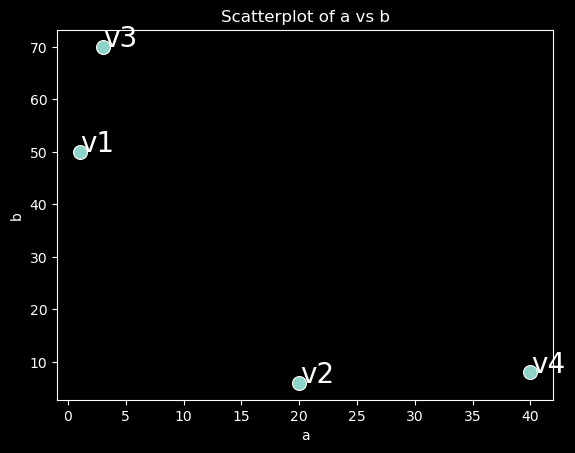

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('dark_background')

ax = sns.scatterplot(x='a', y='b', data=df, s=100);
ax.set(title='Scatterplot of a vs b', xlabel='a', ylabel='b');

def annotate(row):
    plt.text(x=row['a']+0.05, y=row['b'], s=row.name, size=20);

df.apply(annotate, axis=1);

## Transpose


Sometimes we want to flip the axes. When we exchange a matrix’s rows and columns, the result is called its transpose. Formally, we signify a matrix’s $\textbf{A}$ transpose by $\mathbf{A}^\top$ and if $\mathbf{B} = \mathbf{A}^\top$, then $b_{ij} = a_{ij}$ for all $i$ and $j$. Thus, the transpose of an $m \times n$ matrix is an $n \times m$ matrix:

$$ \begin{split}\mathbf{A}^\top =
\begin{bmatrix}
    a_{11} & a_{21} & \dots  & a_{m1} \\
    a_{12} & a_{22} & \dots  & a_{m2} \\
    \vdots & \vdots & \ddots  & \vdots \\
    a_{1n} & a_{2n} & \dots  & a_{mn}
\end{bmatrix}.\end{split} $$

<!-- We can convert any appropriately sized 
 tensor into an 
 matrix by passing the desired shape to reshape:

A matrix is a rectangular array of numbers. Matrices are often used to represent linear transformations such as rotations and reflections. For example, a matrix can be used to represent a rotation of 90 degrees clockwise about the origin.

Matrices can be added together to form new matrices. For example, the matrix representing a rotation of 90 degrees clockwise about the origin can be added to the matrix representing a rotation of 90 degrees counterclockwise about the origin to form the matrix representing a rotation of 180 degrees about the origin.

Matrices can also be multiplied together to form new matrices. For example, the matrix representing a rotation of 90 degrees clockwise about the origin can be multiplied by the matrix representing a rotation of 90 degrees counterclockwise about the origin to form the matrix representing a rotation of 180 degrees about the origin. -->


In pandas, you can transpose a `DataFrame` with the **`.T`** attribute:

In [3]:
df.T

,v1,v2,v3,v4
a,1,20,3,40
b,50,6,70,8


Note that columns of original dataframe `df` are the same as index of `df.T`

In [4]:
df.columns == df.T.index

array([ True,  True])

In [5]:
df.T

,v1,v2,v3,v4
a,1,20,3,40
b,50,6,70,8



## Matrix-Vector Products

Now that we know how to calculate dot products, we can begin to understand the product between an $m \times n$ matrix and an 
$n$-dimensional vector $\mathbf{x}$. 

To start off, we visualize our matrix in terms of its row vectors

$$
\begin{split}\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix},\end{split}
$$

where each $\mathbf{a}^\top_{i} \in \mathbb{R}^n$ is a row vector representing the $i^\textrm{th}$ row of the matrix $\mathbf{A}$.

The matrix–vector product $\mathbf{A}\mathbf{x}$
 is simply a column vector of length $m$
, whose $i^{th}$
 element is the dot product $\mathbf{a}^\top_i \mathbf{x}$

$$
 \begin{split}\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.\end{split}
$$

We can think of multiplication with a matrix $\mathbf{A}\in \mathbb{R}^{m \times n}$ as a transformation that projects vectors from $\mathbb{R}^{n}$ to  $\mathbb{R}^{m}$. 

These transformations are remarkably useful. For example, we can represent rotations as multiplications by certain square matrices. Matrix–vector products also describe the key calculation involved in computing the outputs of each layer in a neural network given the outputs from the previous layer.


### Finding similar vectors

Note that, given a vector $\mathbf{v}$, vector-matrix products can also be used to compute the similarity of $\mathbf{v}$ and each row $\mathbf{a}^\top_i$ of matrix $\mathbf{A}$. This is because the matrix-vector product $\mathbf{A}\mathbf{v}$ will contain the dot products of $\mathbf{v}$ and each row in $\mathbf{A}$.

There is one thing to be careful about: recall that the formula for cosine similarity is: 

$$\text{cos}(\theta) = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}$$

**The dot product (numerator, on the right hand side) is equal to the cosine of the angle between the two vectors when the vectors are normalized (i.e. each divided by their norms).**

The example below shows how to compute the cosine similarity between a vector $\mathbf{v}$ and each row of matrix $\mathbf{A}$.

In [6]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/fahadsultan/csc272/main/data/chat_dataset.csv')

In [7]:
# creating bow representation
vocab = (' '.join(data['message'].values)).lower().split()
bow = pd.DataFrame(columns=vocab)
for word in vocab: 
    bow[word] = data['message'].apply(lambda msg: msg.count(word))

In [8]:
# l2 norm of a vector
def l2_norm(vec):
    return (sum(vec**2))**(1/2)

# bow where each row is a unit vectors i.e. ||row|| = 1
bow_unit = bow.apply(lambda row: row/l2_norm(row), axis=1)

In [9]:
# random message : I don't have an opinion on this
msg = bow_unit.iloc[20] 

# cosine similarity of first message with all other messages
msg_sim = bow_unit.dot(msg.T)
msg_sim.index = data['message']

msg_sim.sort_values(ascending=False)

message
I don't have an opinion on this           1.000000
I don't really have an opinion on this    0.984003
I have no strong opinion about this       0.971575
I have no strong opinions about this      0.971226
I have no strong opinion on this          0.969768
                                            ...   
I'm not sure what to do 😕                 0.204587
I'm not sure what to do next 🤷‍♂️         0.201635
I'm not sure what to do next 🤔            0.200593
The food was not good                     0.200295
The food was not very good                0.197220
Length: 584, dtype: float64


## Matrix-Matrix Multiplication

Once you have gotten the hang of dot products and matrix–vector products, then matrix–matrix multiplication should be straightforward.

Say that we have two matrices $\mathbf{A} \in \mathbb{R}^{n \times k}$ and $\mathbf{B} \in \mathbb{R}^{k \times m}$:

$$ 
\begin{split}\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.\end{split}
$$

Let $\mathbf{a}^\top_{i} \in \mathbb{R}^k$
 denote the row vector representing the $i^\textrm{th}$
 row of the matrix $\mathbf{A}$
 and let $\mathbf{b}_{j} \in \mathbb{R}^k$
 denote the column vector from the $j^\textrm{th}$
 column of the matrix $\mathbf{B}$
:

$$
\begin{split}\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.\end{split}
$$

To form the matrix product $\mathbf{C} \in \mathbb{R}^{n \times m}$
, we simply compute each element $c_{ij}$
 as the dot product between the $i^{\textrm{th}}$
 row of $\mathbf{A}$
 and the $i^{\textrm{th}}$
 column of $\mathbf{B}$
, i.e., $\mathbf{a}^\top_i \mathbf{b}_j$
:

$$
\begin{split}\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.\end{split}
$$
 
 
We can think of the matrix–matrix multiplication $\mathbf{AB}$ as performing $m$ matrix–vector products or $m \times n$ dot products and stitching the results together to form an $m \times n$ matrix. In the following snippet, we perform matrix multiplication on A and B. Here, A is a matrix with two rows and three columns, and B is a matrix with three rows and four columns. After multiplication, we obtain a matrix with two rows and four columns.


### Computing similarity / distance matrix 

Note that, given two matrices $\mathbf{A}$ and $\mathbf{B}$, matrix-matrix products can also be used to compute the similarity between each row $\mathbf{a}^\top_i$ of matrix $\mathbf{A}$ and each row $\mathbf{b}^\top_j$ of matrix $\mathbf{B}$. This is because the matrix-matrix product $\mathbf{A}\mathbf{B}$ will contain the dot products of each pair of rows in $\mathbf{A}$ and $\mathbf{B}$.

In [10]:
similarity_matrix = bow_unit.dot(bow_unit.T)

similarity_matrix.shape

(584, 584)

In [11]:
similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,583
0,1.000000,0.568191,0.453216,0.565809,0.612787,0.608156,0.377769,0.631309,0.793969,0.642410,...,0.516106,0.612624,0.660911,0.490580,0.845518,0.573549,0.648564,0.629598,0.594468,0.570452
1,0.568191,1.000000,0.508206,0.928580,0.687137,0.681944,0.423604,0.707906,0.551139,0.720354,...,0.573755,0.686954,0.741100,0.546166,0.801864,0.643139,0.721001,0.705988,0.652357,0.639666
2,0.453216,0.508206,1.000000,0.506075,0.548093,0.707857,0.778316,0.621438,0.538883,0.648861,...,0.457088,0.547948,0.650512,0.443105,0.593732,0.512998,0.574392,0.605515,0.520351,0.609064
3,0.565809,0.928580,0.506075,1.000000,0.685614,0.679085,0.421828,0.704938,0.548828,0.717334,...,0.571349,0.684074,0.737993,0.543876,0.798502,0.640442,0.717978,0.703027,0.649622,0.638039
4,0.612787,0.687137,0.548093,0.685614,1.000000,0.735468,0.273748,0.559585,0.714100,0.599091,...,0.926494,0.825530,0.806139,0.933257,0.802775,0.945544,0.931874,0.913601,0.928473,0.690556


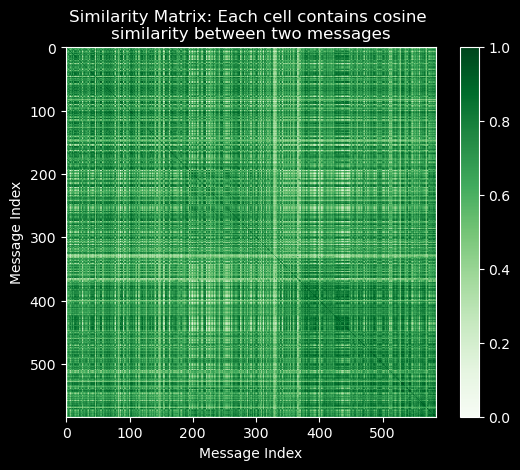

In [15]:
from matplotlib import pyplot as plt
plt.imshow(similarity_matrix, cmap='Greens')
plt.colorbar();
plt.title("Similarity Matrix: Each cell contains cosine \nsimilarity between two messages");
plt.xlabel("Message Index");
plt.ylabel("Message Index");

Note how 1. the similarity matrix is symmetric, i.e. $sim_{ij} = sim_{ji}$ and 2. the diagonal elements are all 1, i.e. $sim_{ii} = 1$.

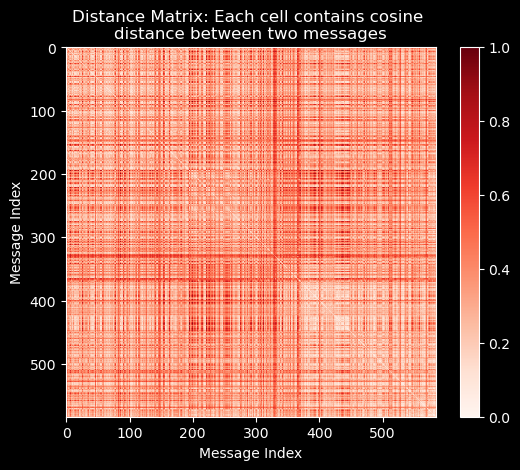

In [16]:
distance_matrix = 1 - bow_unit.dot(bow_unit.T)

from matplotlib import pyplot as plt
plt.imshow(distance_matrix, cmap='Reds')
plt.colorbar();
plt.title("Distance Matrix: Each cell contains cosine \ndistance between two messages");
plt.xlabel("Message Index");
plt.ylabel("Message Index");

# Nearest Neighbor

Nearest Neighbor is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). It is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation.



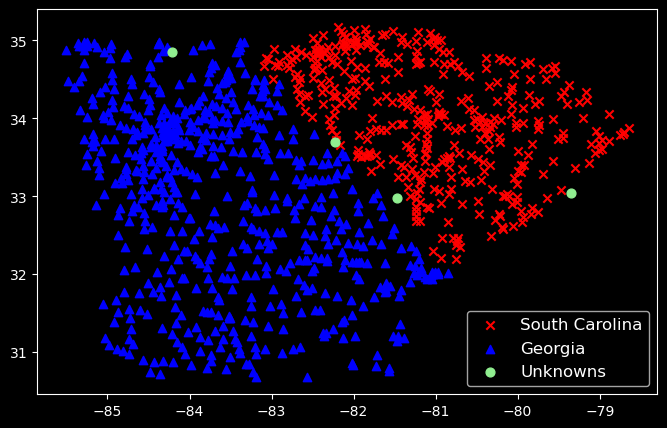

In [ ]:
# import libraries
from matplotlib import pyplot as plt 
import pandas as pd

plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(8, 5))

url  = 'https://raw.githubusercontent.com/fahadsultan/csc343/refs/heads/main/data/uscities.csv'
data = pd.read_csv(url)
us_mainland = data[(data['state_id'] != 'HI') & \
                   (data['state_id'] != 'AK') & \
                   (data['state_id'] != 'PR')]

sc = us_mainland[us_mainland['state_id'] == 'SC']
ga = us_mainland[us_mainland['state_id'] == 'GA']

unknown1 = (33.04366363086289, -79.34728514760124)
unknown2 = (33.69266640894652, -82.22939618795743)
unknown3 = (32.9806084015696,  -81.46763167425789)
unknown4 = (34.84821943641973, -84.2073074091929)

ax.scatter(sc['lng'], sc['lat'], label='South Carolina', color='red',  marker='x');
ax.scatter(ga['lng'], ga['lat'], label='Georgia',        color='blue', marker='^');
ax.scatter(unknown1[1], unknown1[0], s=40, label='Unknowns', color='lightgreen');
ax.scatter(unknown2[1], unknown2[0], s=40, color='lightgreen');
ax.scatter(unknown3[1], unknown3[0], s=40, color='lightgreen');
ax.scatter(unknown4[1], unknown4[0], s=40, color='lightgreen');
ax.legend(fontsize=12);

The algorithm is composed of two stages:

1. Training stage: The algorithm stores all the training data.

2. Testing stage: The algorithm compares the test data with the training data and returns the most similar data.

The algorithm is based on the assumption that the data points that are close to each other are similar. The similarity is calculated using a distance function, such as Euclidean distance, Manhattan distance, Minkowski distance, etc.

The algorithm is simple and easy to implement, but it is computationally expensive, especially when the training data is large. It is also sensitive to the curse of dimensionality, which means that the algorithm's performance deteriorates as the number of dimensions increases.


## Pseudocode

The pseudocode for the nearest neighbor algorithm is as follows:


* For each test data point:
    1. Calculate the distance between the test data point and all training data points.
    2. Sort the distances in ascending order.
    3. Select the nearest data points.
    4. Determine the class of the nearest data points.
    5. Assign the test data point to the nearest neighbor class.



## k-NN Algorithm

The k-NN algorithm is an extension of the nearest neighbor algorithm. Instead of returning the most similar data point, the algorithm returns the k most similar data points. The class of the test data is determined by the majority class of the k most similar data points.

For example, in the figure below, the test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

<br/>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1920px-KnnClassification.svg.png" width="40%" style="filter:invert(1)"></center>
<br/>

The k-NN algorithm is more robust than the nearest neighbor algorithm, as it reduces the noise in the data. However, it is computationally more expensive, as it requires storing and comparing more data points.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/KNN_decision_surface_animation.gif" width="100%" style="filter:invert(1)">
</center>

The k-NN algorithm is a simple and effective algorithm for classification and regression tasks. It is widely used in various fields, such as pattern recognition, image processing, and data mining.


<!-- ## Linear Transformations

A linear transformation is a function that maps vectors to vectors. For example, a rotation of 90 degrees clockwise about the origin is a linear transformation that maps vectors to vectors.

Linear transformations can be represented as matrices. For example, a rotation of 90 degrees clockwise about the origin can be represented as the matrix

$$ \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} $$

## Norms

Norms, in the case of matrices, are more complicated. After all, matrices can be viewed both as collections of individual entries and as objects that operate on vectors and transform them into other vectors. For instance, we can ask by how much longer the matrix–vector product $\mathbf{X} \mathbf{v}$ could be relative to 
. This line of thought leads to what is called the spectral norm. For now, we introduce the Frobenius norm, which is much easier to compute and defined as the square root of the sum of the squares of a matrix’s elements:

$$ \|\mathbf{X}\|_\textrm{F} = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2} $$

The Frobenius norm behaves as if it were an $l_2$ norm of a matrix-shaped vector. Invoking the following function will calculate the Frobenius norm of a matrix.

While we do not want to get too far ahead of ourselves, we already can plant some intuition about why these concepts are useful. In deep learning, we are often trying to solve optimization problems: maximize the probability assigned to observed data; maximize the revenue associated with a recommender model; minimize the distance between predictions and the ground truth observations; minimize the distance between representations of photos of the same person while maximizing the distance between representations of photos of different people. These distances, which constitute the objectives of deep learning algorithms, are often expressed as norms. -->

<!-- ## Tensors -->

<!-- While you can go far in your machine learning journey with only scalars, vectors, and matrices, eventually you may need to work with higher-order tensors. Tensors give us a generic way of describing extensions to $n^{th}$-order arrays. We call software objects of the _tensor_ class “tensors” precisely because they too can have arbitrary numbers of axes. While it may be confusing to use the word tensor for both the mathematical object and its realization in code, our meaning should usually be clear from context. We denote general tensors by capital letters with a special font face (e.g., $\mathsf{X}$, $\mathsf{Y}$, and $\mathsf{Z}$) and their indexing mechanism (e.g., $x_{ijk}$ and $[\mathsf{X}_{1,2i-1,3}]$) follows naturally from that of matrices.

Tensors will become more important when we start working with images. Each image arrives as a 
-order tensor with axes corresponding to the height, width, and channel. At each spatial location, the intensities of each color (red, green, and blue) are stacked along the channel. Furthermore, a collection of images is represented in code by a 
-order tensor, where distinct images are indexed along the first axis. Higher-order tensors are constructed, as were vectors and matrices, by growing the number of shape components. -->

<!-- <center>

<img width="70%" src="../assets/tensors.png">

<img width="70%" src="../assets/tensors2.png">

<img width="30%" src="../assets/tensors3.png">

</center> -->